In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
# Load the dataset
df = pd.read_csv('house.csv')
df.head()
df.isnull().sum()



bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [3]:
# Step 1: Data Cleaning
# Handling missing values by imputing the median for numeric features
df.fillna(df.median(), inplace=True)

# Check for any remaining missing values
df.isnull().sum()


bedroom_count      0
net_sqm            0
center_distance    0
metro_distance     0
floor              0
age                0
price              0
dtype: int64

In [4]:
df

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176
...,...,...,...,...,...,...,...
4303,9,175.166533,1299.71,217.739012,2,5,102707.356224
4304,6,215.352151,1346.36,77.724676,14,5,99695.064992
4305,5,299.563972,1585.37,235.537881,3,5,93803.715617
4306,1,29.193907,1896.23,147.223827,4,2,92914.729126


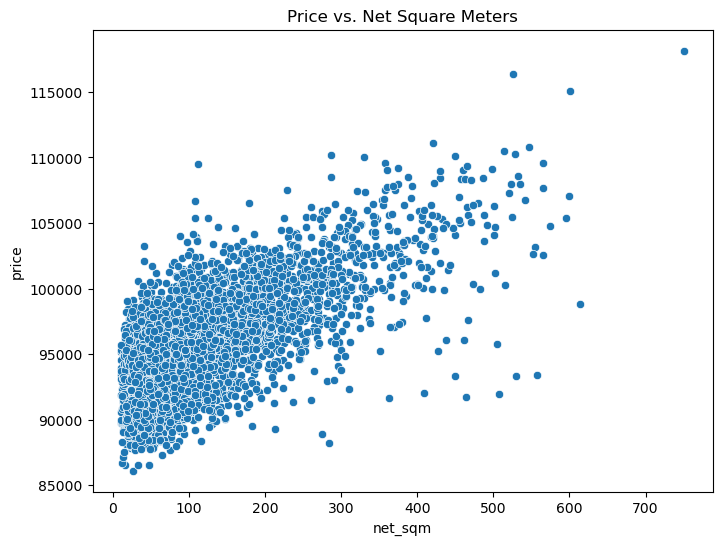

In [5]:

# Step 2: Data Visualization

# Scatter plot of Price vs. Net Square Meters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='net_sqm', y='price', data=df)
plt.title('Price vs. Net Square Meters')
plt.show()


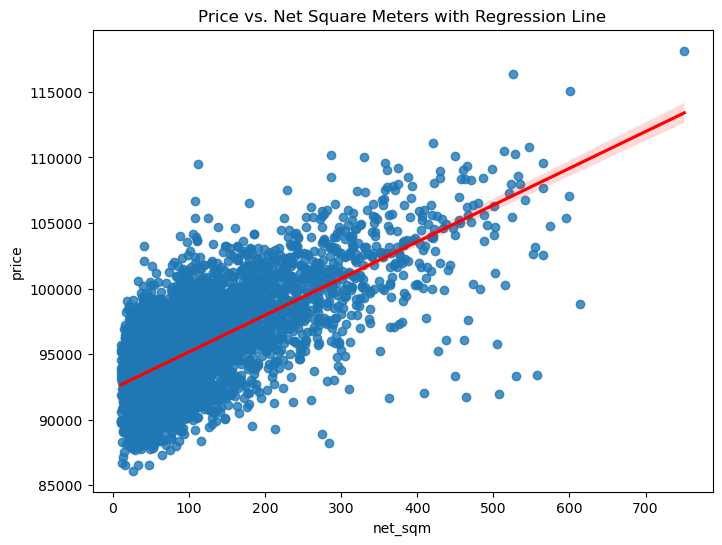

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     3744.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:53:31   Log-Likelihood:                -40408.
No. Observations:                4308   AIC:                         8.082e+04
Df Residuals:                    4306   BIC:                         8.083e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.237e+04     69.791   1323.542      0.0

In [22]:
import statsmodels.api as sm

# Step 1: Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='net_sqm', y='price', data=df, line_kws={'color': 'red'})
plt.title('Price vs. Net Square Meters with Regression Line')
plt.show()

# Step 2: OLS regression to get coefficients and p-value
# Adding a constant to the independent variable
X = sm.add_constant(df['net_sqm'])
y = df['price']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary with coefficient, t-test, and p-values
summary = model.summary()
print(summary)


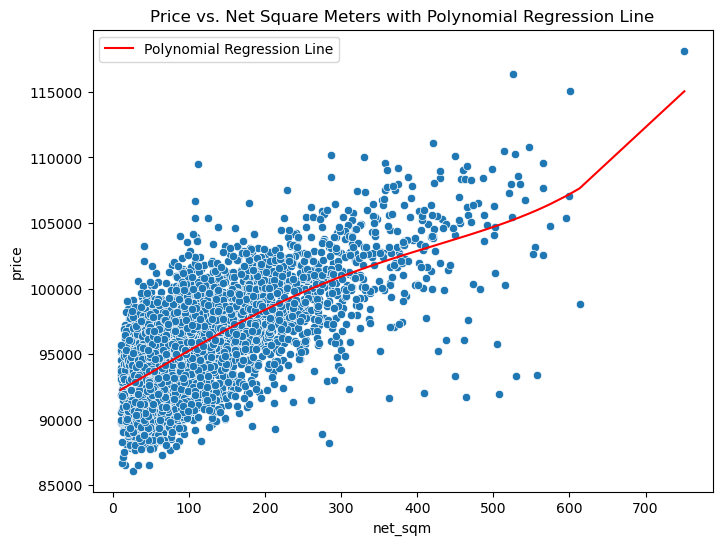

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     960.2
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:04:48   Log-Likelihood:                -40382.
No. Observations:                4308   AIC:                         8.077e+04
Df Residuals:                    4303   BIC:                         8.081e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.195e+04    181.797    505.774      0.0

In [54]:
from sklearn.preprocessing import PolynomialFeatures


# Step 1: Generate polynomial features (let's use a degree of 2 for quadratic)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(df[['net_sqm']])  # Transform the independent variable (net_sqm)

# Step 2: Fit the polynomial regression model
model_poly = sm.OLS(df['price'], X_poly).fit()

# Step 3: Scatter plot with polynomial regression line
# Sort the values to ensure a smooth curve when plotting
sorted_idx = np.argsort(df['net_sqm'])
sorted_sqm = df['net_sqm'].values[sorted_idx]
sorted_price_pred = model_poly.predict(X_poly)[sorted_idx]

plt.figure(figsize=(8, 6))
# Scatter plot
sns.scatterplot(x='net_sqm', y='price', data=df)
# Plot polynomial regression line
plt.plot(sorted_sqm, sorted_price_pred, color='red', label='Polynomial Regression Line')
plt.title('Price vs. Net Square Meters with Polynomial Regression Line')
plt.legend()
plt.show()

# Step 4: Display the coefficients, t-tests, and p-values
summary_poly = model_poly.summary()
print(summary_poly)


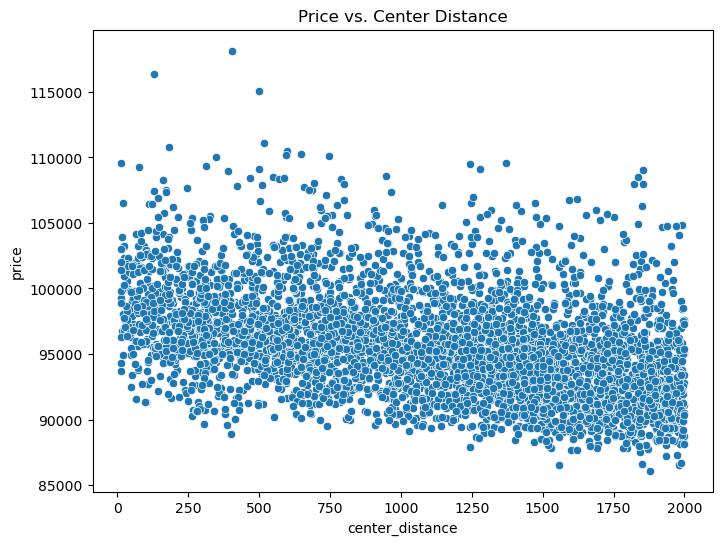

In [6]:

# Scatter plot of Price vs. Center Distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='center_distance', y='price', data=df)
plt.title('Price vs. Center Distance')
plt.show()



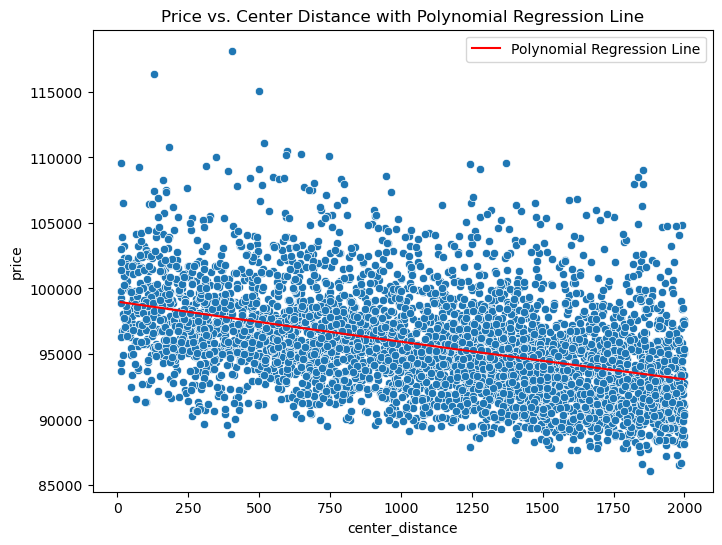

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     456.3
Date:                Tue, 15 Oct 2024   Prob (F-statistic):          1.87e-180
Time:                        16:54:06   Log-Likelihood:                -41342.
No. Observations:                4308   AIC:                         8.269e+04
Df Residuals:                    4305   BIC:                         8.271e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.899e+04    188.988    523.813      0.0

In [27]:
from sklearn.preprocessing import PolynomialFeatures


# Step 1: Generate polynomial features (let's use a degree of 2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['center_distance']])  # Transform the independent variable (net_sqm)

# Step 2: Fit the polynomial regression model
model_poly = sm.OLS(df['price'], X_poly).fit()

# Step 3: Scatter plot with polynomial regression line
# Sort the values to ensure a smooth curve when plotting
sorted_idx = np.argsort(df['center_distance'])
sorted_sqm = df['center_distance'].values[sorted_idx]
sorted_price_pred = model_poly.predict(X_poly)[sorted_idx]

plt.figure(figsize=(8, 6))
# Scatter plot
sns.scatterplot(x='center_distance', y='price', data=df)
# Plot polynomial regression line
plt.plot(sorted_sqm, sorted_price_pred, color='red', label='Polynomial Regression Line')
plt.title('Price vs. Center Distance with Polynomial Regression Line')
plt.legend()
plt.show()

# Step 4: Display the coefficients, t-tests, and p-values
summary_poly = model_poly.summary()
print(summary_poly)


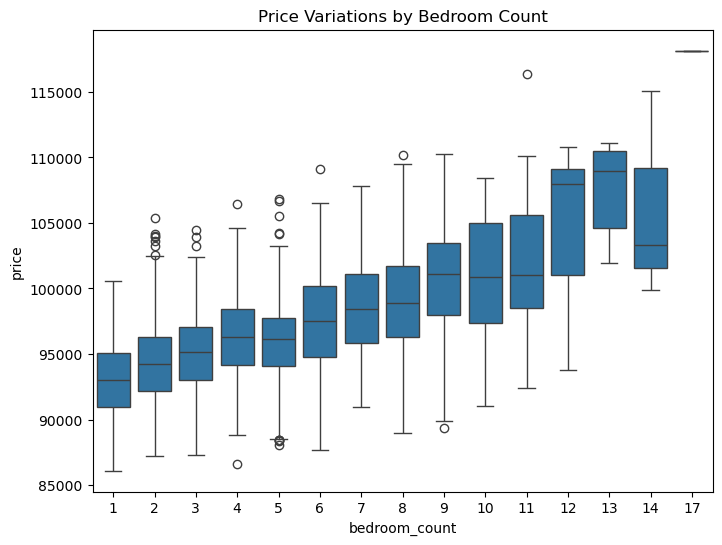

In [7]:
# Box plot to visualize price variations across Bedroom Count categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='bedroom_count', y='price', data=df)
plt.title('Price Variations by Bedroom Count')
plt.show()



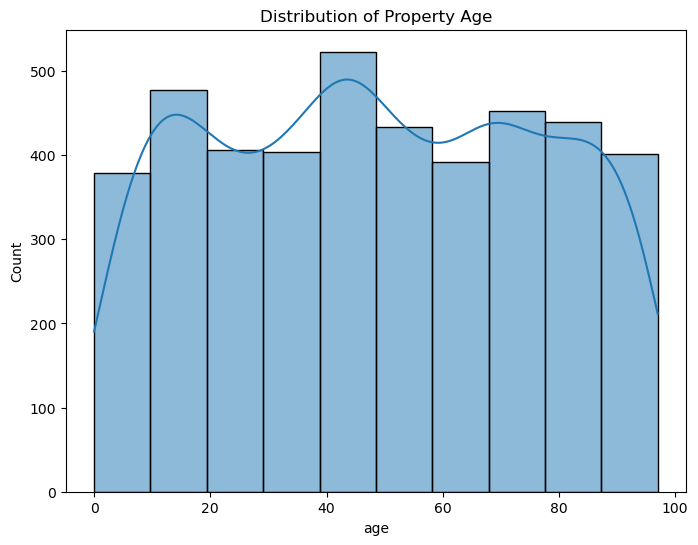

In [8]:
# Histogram to show the distribution of property Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Property Age')
plt.show()



In [28]:
# Step 3: Data Summarization
# Descriptive statistics
df.describe().T



,count,mean,std,min,25%,50%,75%,max
bedroom_count,4308.0,3.732823,2.476989,1.000000,2.000000,3.000000,5.000000,17.000000
net_sqm,4308.0,118.941327,95.469802,10.244518,52.240659,91.828201,150.987591,750.971604
center_distance,4308.0,1090.544301,555.325830,11.800000,635.897500,1143.135000,1554.280000,1999.840000
metro_distance,4308.0,105.665358,60.750825,1.245338,56.156897,101.388012,148.481068,330.275317
floor,4308.0,9.397168,7.517018,1.000000,2.000000,8.000000,16.000000,24.000000
age,4308.0,48.576834,27.621465,0.000000,25.000000,48.000000,72.000000,97.000000
price,4308.0,95701.196185,3919.823988,86113.592974,92934.251436,95337.792918,97980.675094,118134.771190


In [29]:
# Step 4: Statistical Tests

# Pearson correlation between Net Sqm and Price
correlation, p_value_corr = stats.pearsonr(df['net_sqm'], df['price'])
print(f"Pearson correlation between Net Sqm and Price: {correlation} with a pvalue of: {p_value_corr}")



Pearson correlation between Net Sqm and Price: 0.681986907545342 with a pvalue of: 0.0


In [11]:
df.corr()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
bedroom_count,1.000000,0.753441,-0.014428,0.022111,-0.534736,-0.056951,0.552405
net_sqm,0.753441,1.000000,-0.008848,0.031006,-0.409225,-0.050120,0.681987
center_distance,-0.014428,-0.008848,1.000000,0.581200,0.022840,0.011684,-0.418161
metro_distance,0.022111,0.031006,0.581200,1.000000,0.003137,0.011848,-0.146373
floor,-0.534736,-0.409225,0.022840,0.003137,1.000000,0.022045,-0.136713
age,-0.056951,-0.050120,0.011684,0.011848,0.022045,1.000000,-0.225119
price,0.552405,0.681987,-0.418161,-0.146373,-0.136713,-0.225119,1.000000


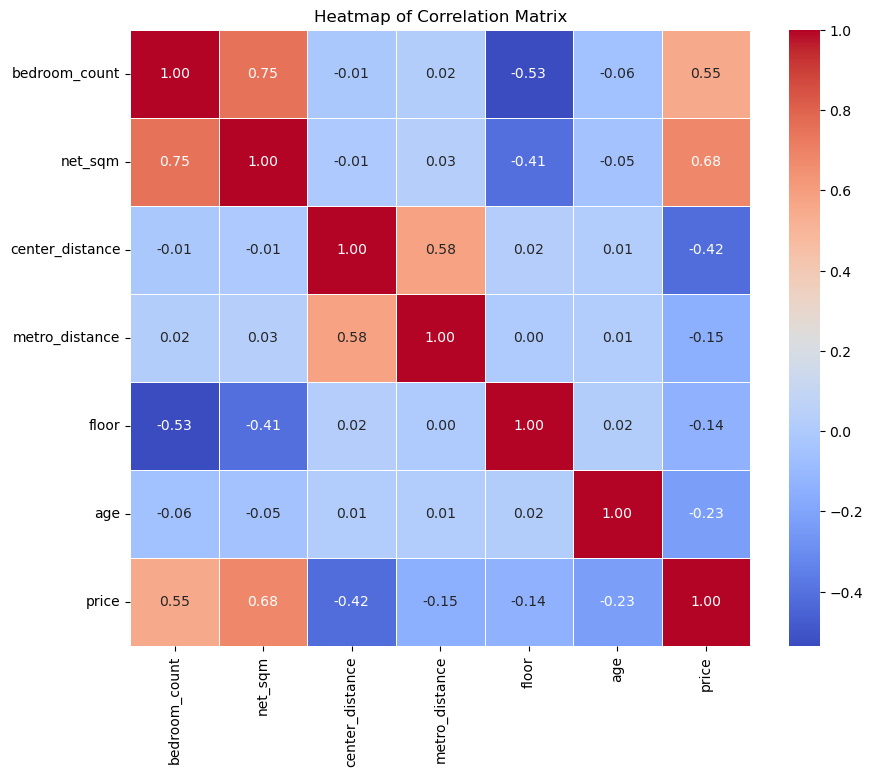

In [12]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

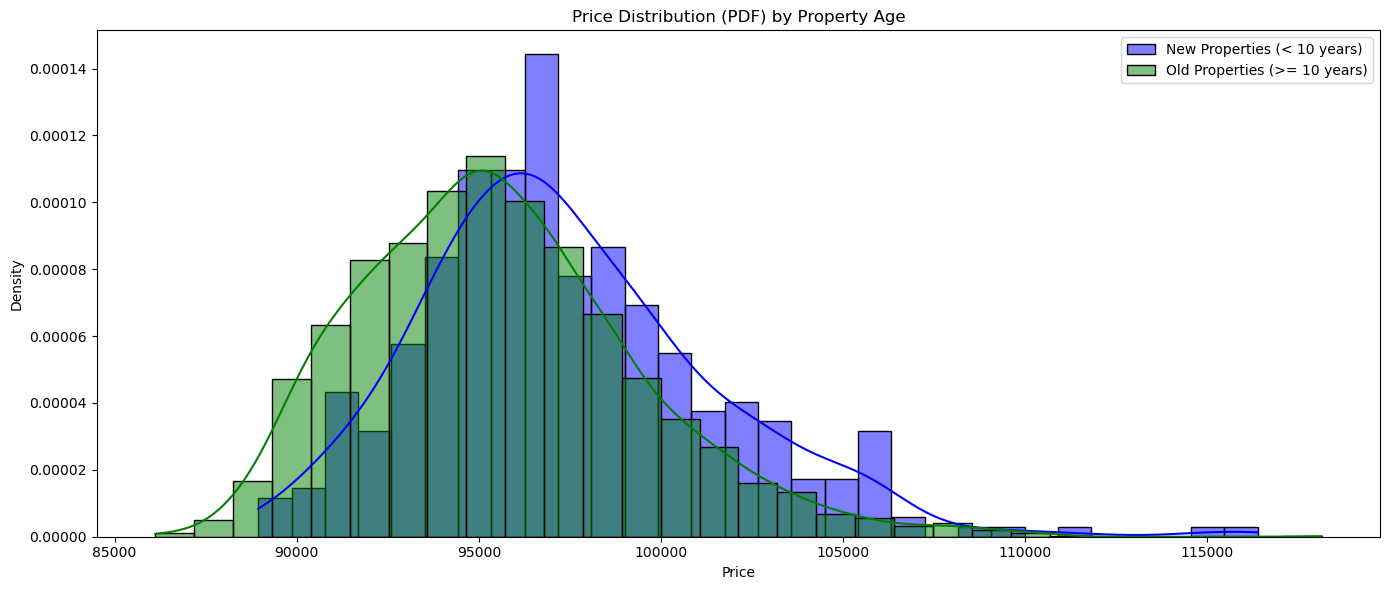

In [15]:
# T-test to compare prices between newer properties (Age < 10 years) and older properties
new_properties = df[df['age'] < 10]['price']
old_properties = df[df['age'] >= 10]['price']



# Plot histograms (PDFs) for both distributions
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 1, 1)
sns.histplot(new_properties, label="New Properties (< 10 years)", color='blue', kde=True, stat="density", bins=30)
sns.histplot(old_properties, label="Old Properties (>= 10 years)", color='green', kde=True, stat="density", bins=30)
plt.title('Price Distribution (PDF) by Property Age')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()





In [46]:
### Shapiro

print(stats.shapiro(new_properties))
print(stats.shapiro(old_properties))

ShapiroResult(statistic=0.9616674184799194, pvalue=2.1460463628386606e-08)
ShapiroResult(statistic=0.9756841063499451, pvalue=2.2414227839977683e-25)


In [68]:
### Kolmogorov-Smirnoff

print(stats.kstest(new_properties,'norm'))

print(stats.kstest(old_properties,'norm'))


KstestResult(statistic=1.0, pvalue=0.0, statistic_location=88940.16127151658, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=86113.59297392477, statistic_sign=-1)


In [ ]:
### CLT Animation
https://www.youtube.com/watch?v=MvaWss5vSGI&ab_channel=algorithMusicVideo

https://youtube.com/shorts/KMoqI9hc3FE?si=mGpe7dFdIzvn04Kf
    

# T-test

In [32]:
mean_new = np.mean(new_properties)
mean_old = np.mean(old_properties)
mean_difference = mean_new - mean_old

In [33]:
var_new = np.var(new_properties, ddof=1)
var_old = np.var(old_properties, ddof=1)
n_new = len(new_properties)
n_old = len(old_properties)

# Step 3: Compute pooled standard deviation
pooled_std = np.sqrt(((n_new - 1) * var_new + (n_old - 1) * var_old) / (n_new + n_old - 2))

# Step 4: Compute pooled standard error
pooled_se = pooled_std * np.sqrt(1/n_new + 1/n_old)

# Step 5: Compute t-statistic
t_stat_eq_var = mean_difference / pooled_se

t_stat_eq_var

9.008468531341142

In [34]:
# Step 5: Compute t-statistic assuming no equality of variance


se_old = np.std(old_properties, ddof=1) / n_old**0.5
se_new = np.std(new_properties, ddof=1) / n_new**0.5
se_total = (se_new**2 + se_old**2)**0.5
t_stat = mean_difference / se_total

t_stat

8.60392380673042

In [35]:
# T-test to compare prices between newer properties (Age < 10 years) and older properties

t_stat, p_value = stats.ttest_ind(old_properties,new_properties)

print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


if p_value < 0.05:
    print("There is a statistically significant difference in price between newer and older properties.")
else:
    print("There is no statistically significant difference in price between newer and older properties.")

T-test results: t-statistic = -9.008468531341142, p-value = 3.0766667575024143e-19
There is a statistically significant difference in price between newer and older properties.


In [36]:
t_stat, p_value = stats.ttest_ind(old_properties,new_properties, equal_var=False)

print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")


if p_value < 0.05:
    print("There is a statistically significant difference in price between newer and older properties.")
else:
    print("There is no statistically significant difference in price between newer and older properties.")

T-test results: t-statistic = -8.603923806730421, p-value = 1.3279589036679045e-16
There is a statistically significant difference in price between newer and older properties.


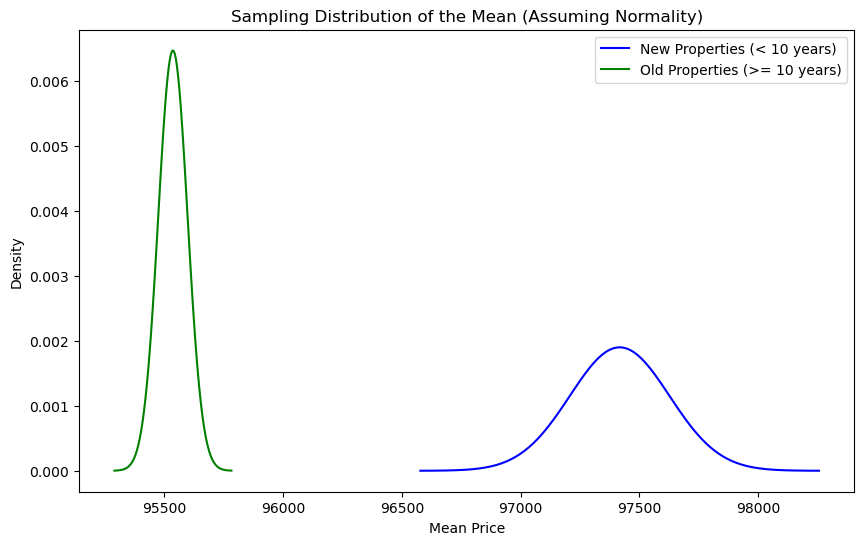

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Compute the means and standard errors
mean_new = np.mean(new_properties)
mean_old = np.mean(old_properties)
std_err_new = np.std(new_properties, ddof=1) / np.sqrt(len(new_properties))
std_err_old = np.std(old_properties, ddof=1) / np.sqrt(len(old_properties))

# Generate points for normal distributions
x_values_new = np.linspace(mean_new - 4*std_err_new, mean_new + 4*std_err_new, 100)
x_values_old = np.linspace(mean_old - 4*std_err_old, mean_old + 4*std_err_old, 100)

# Plotting the normal distributions for the sampling distribution of the mean
plt.figure(figsize=(10, 6))

# Plot the distributions
sns.lineplot(x=x_values_new, y=norm.pdf(x_values_new, mean_new, std_err_new), label="New Properties (< 10 years)", color='blue')
sns.lineplot(x=x_values_old, y=norm.pdf(x_values_old, mean_old, std_err_old), label="Old Properties (>= 10 years)", color='green')

plt.title('Sampling Distribution of the Mean (Assuming Normality)')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend()

plt.show()


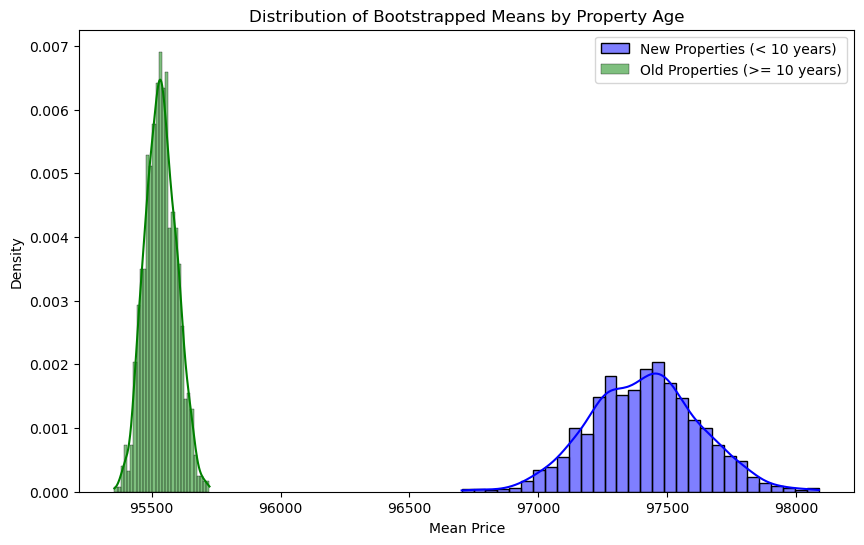

212.25871563934004 60.506855633287586


In [43]:
import numpy as np

# Function to perform bootstrapping
def bootstrap_means(data, n_bootstrap=1000):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

# Generate bootstrap distributions of the means for both groups
n_bootstrap = 1000
bootstrap_means_new = bootstrap_means(new_properties, n_bootstrap)
bootstrap_means_old = bootstrap_means(old_properties, n_bootstrap)

# Plotting the distribution of the bootstrapped means
plt.figure(figsize=(10, 6))

sns.histplot(bootstrap_means_new, label="New Properties (< 10 years)", color='blue', kde=True, stat="density", bins=30)
sns.histplot(bootstrap_means_old, label="Old Properties (>= 10 years)", color='green', kde=True, stat="density", bins=30)

plt.title('Distribution of Bootstrapped Means by Property Age')
plt.xlabel('Mean Price')
plt.ylabel('Density')
plt.legend()

plt.show()
print(np.std(bootstrap_means_new),np.std(bootstrap_means_old))

In [41]:
print(std_err_new,std_err_old)


209.85672238421373 61.64306303051566


## Extra: Intro to regression

### Linear Regression Equation:

$$
\text{Price} = \beta_0 + \beta_1 \cdot \text{bedroom_count} + \beta_2 \cdot \text{net_sqm} + \beta_3 \cdot \text{center_distance} + \beta_4 \cdot \text{metro_distance} + \beta_5 \cdot \text{floor} + \beta_6 \cdot \text{age}
$$

Where:
- $$\beta_0 $$ is the **intercept** (the predicted price when all other features are 0).
- $$\beta_1, \beta_2, \dots, \beta_6 $$ are the **coefficients** for each feature, representing the change in the house price for a one-unit change in that particular feature, assuming all other features are held constant.


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Define Features (X) and Target (y)
X = df[['bedroom_count', 'net_sqm', 'center_distance', 'metro_distance', 'floor', 'age']]  # Features
y = df['price']  # Target (price)

X = sm.add_constant(X)


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the linear regression model
model = sm.OLS(y, X).fit()

# Print the detailed summary
print(model.summary())

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     1835.
Date:                Tue, 15 Oct 2024   Prob (F-statistic):               0.00
Time:                        17:10:35   Log-Likelihood:                -39021.
No. Observations:                4308   AIC:                         7.806e+04
Df Residuals:                    4301   BIC:                         7.810e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             9.46e+04    129.991    7

In [18]:
# In sample R-square

r2_score(y_train, model.predict(X_train))


0.7163956999541068

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Step 2: Define Features (X) and Target (y)
X = df[['bedroom_count', 'net_sqm', 'metro_distance', 'floor', 'age']]  # Features
y = df['price']  # Target (price)

X = sm.add_constant(X)


# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the linear regression model
model = sm.OLS(y, X).fit()

# Print the detailed summary
print(model.summary())

# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        10:32:25   Log-Likelihood:                -39942.
No. Observations:                4308   AIC:                         7.990e+04
Df Residuals:                    4302   BIC:                         7.993e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.279e+04    154.006    602.